# simple Linear Regression

In [2]:
# ignore non harmful warnings
from warnings import filterwarnings

filterwarnings("ignore")

# STEP 1 - Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("50_Startups(1).csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Step 2 - Perform basic data quality checks

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:

# Check missing values in dataframe
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [ ]:

# Check duplicate rows
df.duplicated().sum()


np.int64(0)

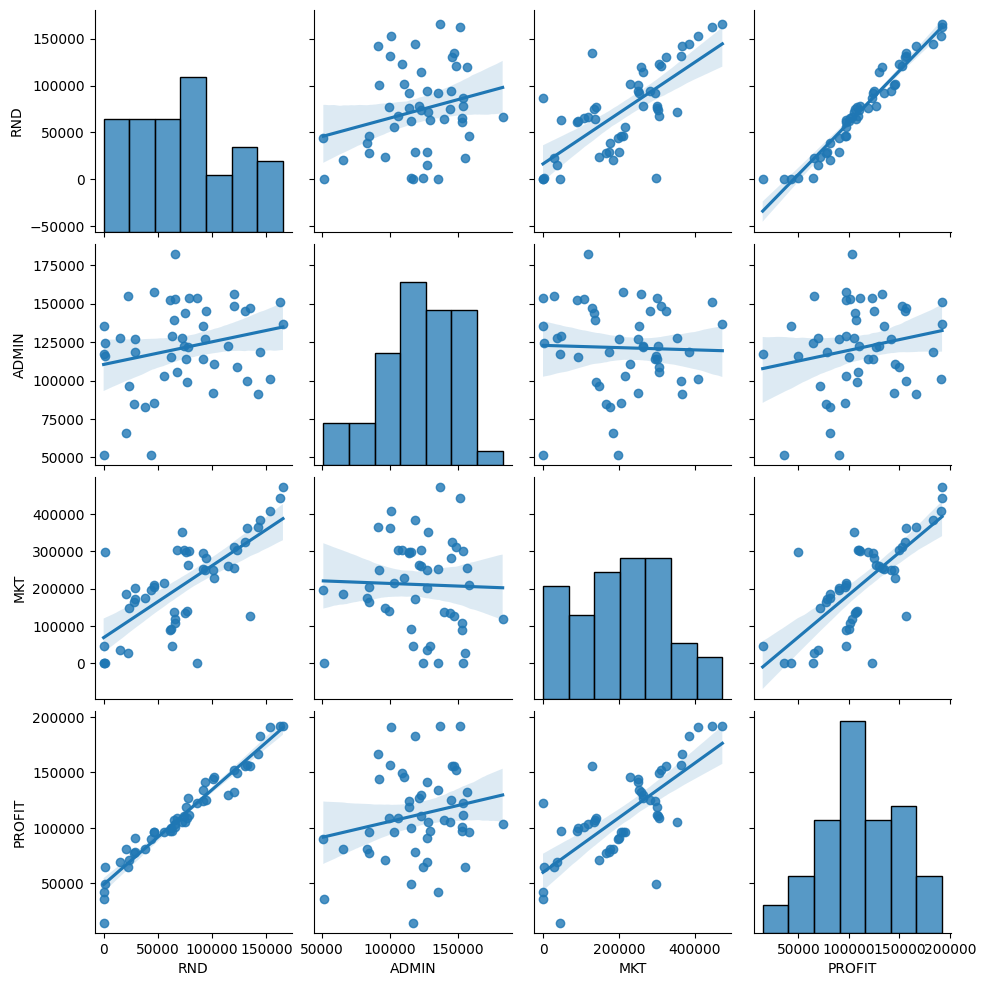

In [7]:


import seaborn as sns

sns.pairplot(df, kind="reg")



In [8]:
df.corr(numeric_only=True)


,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# Step 3 - Seperate X and Y columns

In [9]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [10]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [11]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 4 - Building Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model.intercept_

array([49032.89914125])

In [14]:
model.coef_

array([[0.85429137]])


# Step 5 - Model Evaluation

    Root Mean Squared Error
    Mean Absolute Error
    Mean Absolute Percentage Error
    R2 Score



In [15]:


ypred = model.predict(X)
ypred[0:5]



array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [16]:


Y.head()



,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [17]:


from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)



In [18]:
def evaluate_model(model, x, y):
    # Predict the estimated values by model
    ypred = model.predict(x)

    # Calulate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [19]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


In [20]:
model.score(X, Y)

0.9465353160804393

# Step 6 - Out of sample prediction

In [21]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [22]:
rnd = 2_50_000

model.predict([[rnd]])

array([[262605.74187595]])